In [1]:
%cd /content/drive/My Drive/Project/Pytorch Tutorial/Machine Learning

/content/drive/My Drive/Project/Pytorch Tutorial/Machine Learning


In [2]:
import torch
import torchvision

import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [3]:
# Load dataset
def load_dataset(name):
  with open(name, "r") as file:
    data = file.read()
    data = data.split("\n")
    data = [instance.split("\t") for instance in data]
    data = [list(map(float, i)) for i in data if i != [""]]
  return torch.Tensor(data)

In [4]:
def euclidian(a, b):
  return torch.linalg.norm(a - b)

In [5]:
# hyper paramter
k = 2
epsilon = 0
data_file = "data/durudataset.txt"

In [6]:
#list to store past centroid
history_centroids = []

# method that use to calculate disctance between two point (scalar)
dist_method = euclidian

# Load our data
dataset = load_dataset(data_file)

# get the number of rows (instances) and columns (features) from the dataset 
num_instances, num_features = dataset.size()

# get a random centroid
c = torch.randint(low = 0, high = num_instances - 1, size = (1,k))[0]
prototypes = dataset[c]

# save our centroid o show progress over time
history_centroids.append(prototypes)

# to keep track of centroid at every iteration
prototypes_old  = torch.zeros(prototypes.size())

#to store clusters
belongs_to = torch.zeros((num_instances, 1))

# calculate dist berween current centroid and past centroid
norm = dist_method(prototypes, prototypes_old)

iteration = 0
while norm > epsilon:
  iteration += 1
  norm = dist_method(prototypes, prototypes_old)
  prototypes_old = prototypes
  #for each instance in the dataset
  for index_instance, instance in enumerate(dataset):
    #define a distance vector of size k
    dist_vec = torch.zeros((k, 1))
    #for each centroid
    for index_prototype, prototype in enumerate(prototypes):
      #compute the distance between x and centroid
      dist_vec[index_prototype] = dist_method(prototype, instance)
    
    #find the smallest distance, assign that distance to a cluster
    belongs_to[index_instance, 0] = torch.argmin(dist_vec)
  
  tmp_prototypes = torch.zeros((k, num_features))
  #for each cluster (k of them)
  for index in range(len(prototypes)):
    #get all the points assigned to a cluster
    instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
    #find the mean of those points, this is our new centroid
    prototype = torch.mean(dataset[instances_close], axis=0)
    #add our new centroid to our new temporary list
    tmp_prototypes[index, :] = prototype
  # set the new list to the current lis
  prototypes = tmp_prototypes

  # add our calculated centroids to our history for plotting
  history_centroids.append(tmp_prototypes)

tensor([4, 0])


## Final


Centroid : tensor([[1.5806, 1.5690],
        [0.2233, 0.2896]])


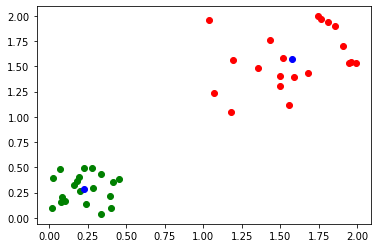

In [14]:
# the best centroid 
centroids = history_centroids[-1]

# color for each cluster
color = ["r", "g"]
print("\nCentroid :",centroids, )

# for each data in dataset
for ind, data in enumerate(dataset):
  # get distance between data and centroid
  dist_centroid = torch.tensor([dist_method(centroid, data) for centroid in centroids])
  # get the closest centroid
  close_centroid = torch.argmin(dist_centroid).item()
  x, y = data
  plt.plot(x.item(), y.item(), color[close_centroid] + "o")

# display centroid in graph with blue color
for centroid in centroids:
  x_centroid, y_centroid = centroid
  plt.plot(x_centroid.item(), y_centroid.item(), "bo")

plt.show()


Centroid : tensor([[0.1591, 0.3251],
        [0.1967, 0.2662]])


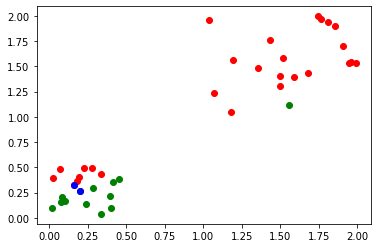


Centroid : tensor([[1.1674, 1.2467],
        [0.3507, 0.2700]])


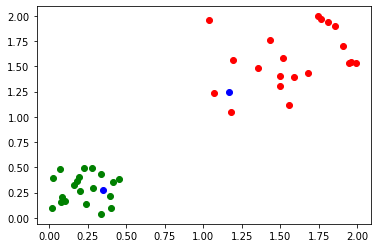


Centroid : tensor([[1.5806, 1.5690],
        [0.2233, 0.2896]])


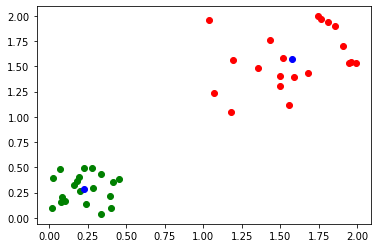


Centroid : tensor([[1.5806, 1.5690],
        [0.2233, 0.2896]])


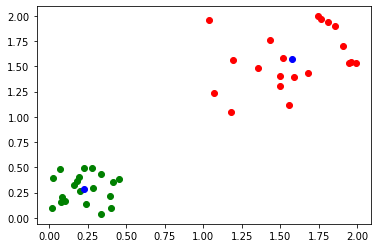


Centroid : tensor([[1.5806, 1.5690],
        [0.2233, 0.2896]])


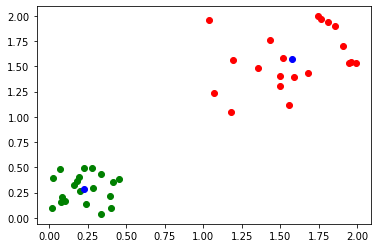

In [11]:
for centroids in history_centroids:
  color = ["r", "g"]
  print("\nCentroid :",centroids, )
  for ind, data in enumerate(dataset):
    x, y = data
    dist_centroid = torch.tensor([dist_method(centroid, data) for centroid in centroids])
    close_centroid = torch.argmin(dist_centroid).item()
    plt.plot(x.item(), y.item(), color[close_centroid] + "o")

  for centroid in centroids:
    x_centroid, y_centroid = centroid
    plt.plot(x_centroid.item(), y_centroid.item(), "bo")

  plt.show()